In [113]:
import pandas as pd
import numpy as np
# import scicit learn decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Preparing the dataset

In [114]:
passenger_data = pd.read_csv("Titanic-Dataset.csv")
print(passenger_data.shape)
passenger_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# select features (PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) and target (survived)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
target = passenger_data.columns[1]

# delete rows with missing values in the Age column
passenger_data = passenger_data.dropna(subset=["Age"])

# delete rows with missing values in the Embarked column
passenger_data = passenger_data.dropna(subset=["Embarked"])

# encode the sex column (Female = 0, Male = 1)
passenger_data["Sex"] = passenger_data["Sex"].replace({"female": 0, "male": 1})
# one-hot encode the Embarked column
passenger_data = pd.get_dummies(passenger_data, columns=["Embarked"])

passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [116]:

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(passenger_data[features], passenger_data[target], test_size=0.2, random_state=42)

## Decision Tree Classifier
### Max depth: 3

In [117]:
# create a decision tree model with max_depth=3
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [118]:
# make predictions
predictions = model.predict(X_test)

# calculate the accuracy of the model
accuracy = np.mean(predictions == y_test)  
print("Accuracy: ", accuracy)

Accuracy:  0.7482517482517482


In [119]:
# get the feature importances and print them with their names
feature_importances = model.feature_importances_
feature_names = X_train.columns 
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)

Feature importances:
Pclass 0.2527589326653694
Sex 0.6139455999985182
Age 0.09754536427939202
SibSp 0.0
Parch 0.0
Fare 0.0357501030567204
Embarked_C 0.0
Embarked_Q 0.0
Embarked_S 0.0


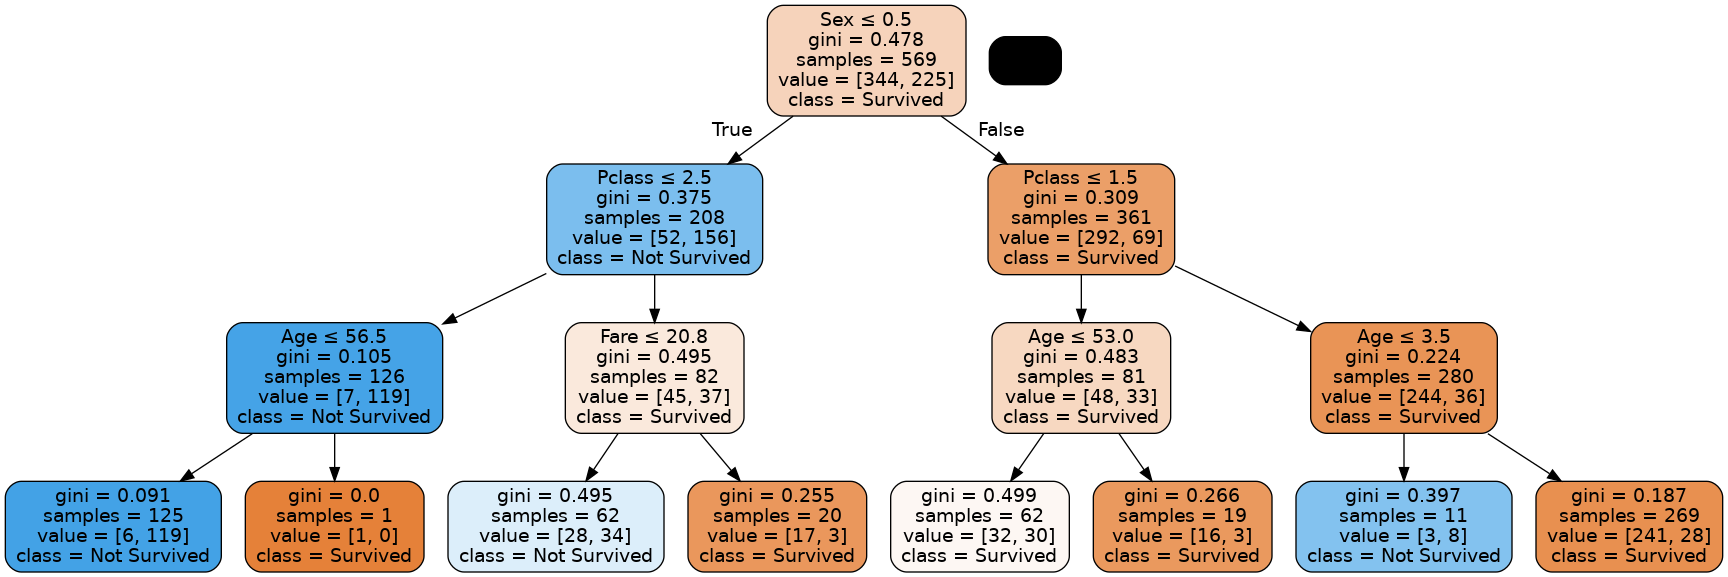

In [120]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import re

# Export the decision tree as a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_names,
                           class_names=['Survived', 'Not Survived'],
                           filled=True, rounded=True,
                           special_characters=True)


# Function to remove 'samples' and 'value' from the labels
def modify_dot(dot_data):
    # Use regular expressions to modify the labels
    # dot_data = re.sub(r'<br/>samples = \d+', '', dot_data)
    dot_data = re.sub(r'<br/>value = \[.*?\]', '', dot_data)
    # dot_data = re.sub(r'<br/>gini = [0-9.]+', '', dot_data)
    # dot_data = re.sub(r'<br/>class = \w+', '', dot_data)
    return dot_data

# Modify the dot data
modified_dot_data = modify_dot(dot_data)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Generate the image file
graph.write_png('decision_tree_depth_3.png')

# Display the image
Image(graph.create_png())

### Max Depth 7

In [121]:
model2 = DecisionTreeClassifier(random_state=42, max_depth=7)
model2.fit(X_train, y_train)
# make predictions
predictions2 = model2.predict(X_test)

# calculate the accuracy of the model
accuracy2 = np.mean(predictions2 == y_test)  
print("Accuracy: ", accuracy2)

Accuracy:  0.7132867132867133


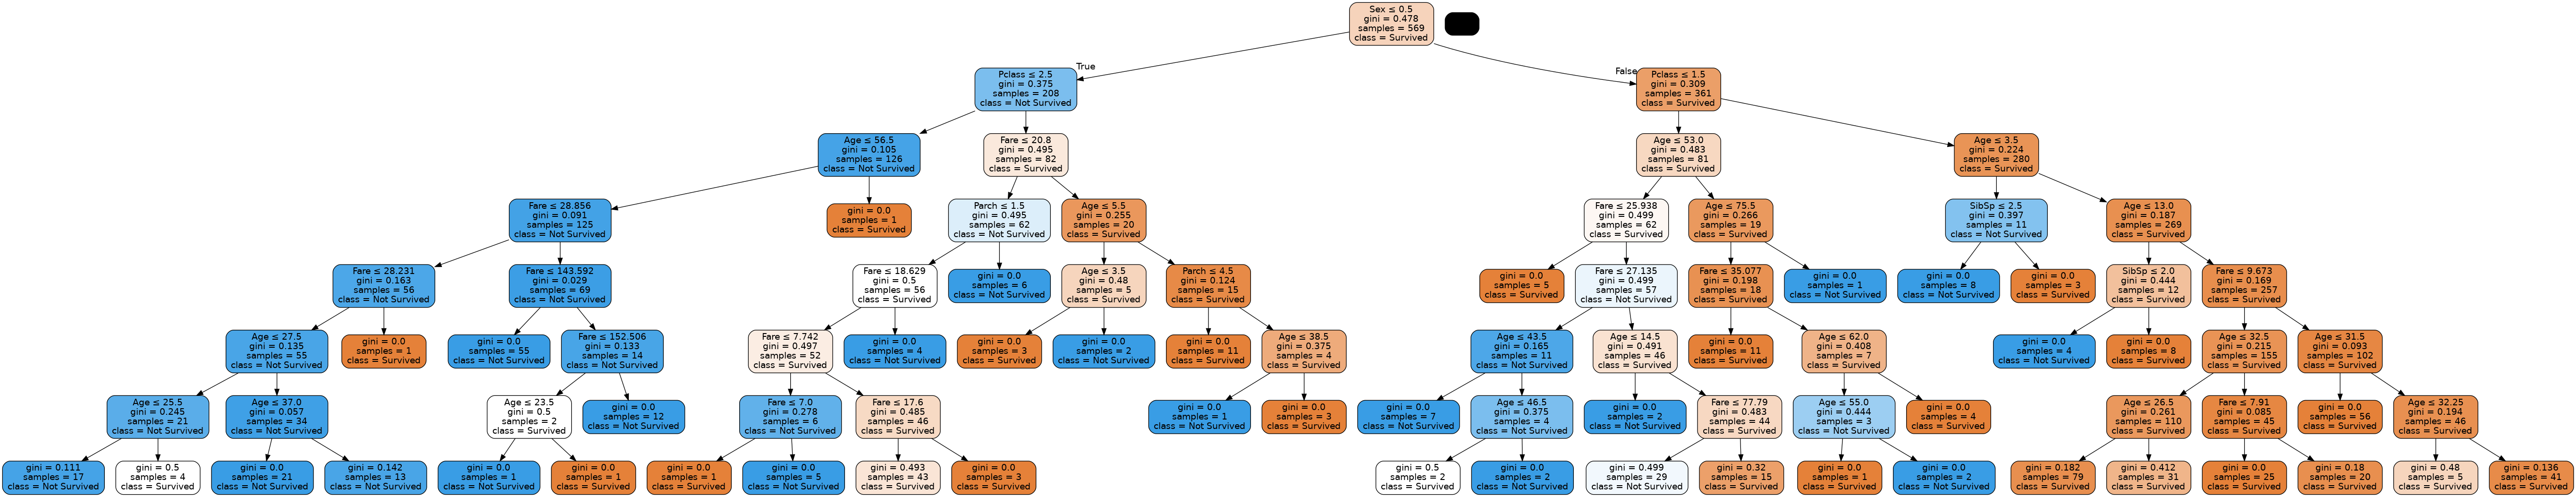

In [122]:
# Export the decision tree as a dot file
dot_data = export_graphviz(model2, out_file=None,
                           feature_names=feature_names,
                           class_names=['Survived', 'Not Survived'],
                           filled=True, rounded=True,
                           special_characters=True)


# Function to remove 'samples' and 'value' from the labels
def modify_dot(dot_data):
    # Use regular expressions to modify the labels
    # dot_data = re.sub(r'<br/>samples = \d+', '', dot_data)
    dot_data = re.sub(r'<br/>value = \[.*?\]', '', dot_data)
    # dot_data = re.sub(r'<br/>gini = [0-9.]+', '', dot_data)
    # dot_data = re.sub(r'<br/>class = \w+', '', dot_data)
    return dot_data

# Modify the dot data
modified_dot_data = modify_dot(dot_data)

# Create a graph from the dot data
graph = pydotplus.graph_from_dot_data(modified_dot_data)

# Generate the image file
graph.write_png('decision_tree_depth_7.png')

# Display the image
Image(graph.create_png())

In [123]:
# grid search for the best max_depth
max_depths = np.arange(1, 21)
accuracies = []
for max_depth in max_depths:
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

# find the max_depth that gives the highest accuracy
best_max_depth = max_depths[np.argmax(accuracies)]
print("Best max_depth:", best_max_depth)
print("Best accuracy:", accuracies[np.argmax(accuracies)])

Best max_depth: 6
Best accuracy: 0.7622377622377622


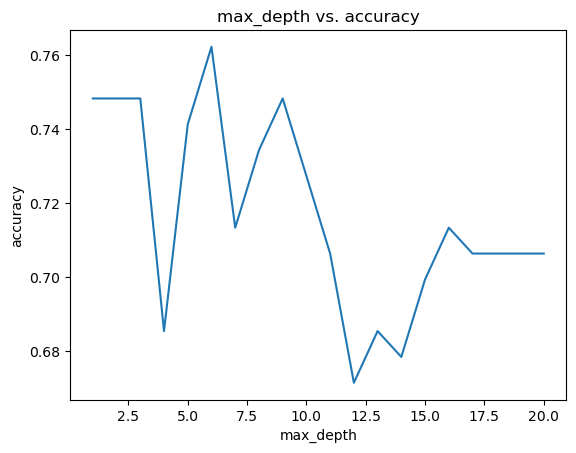

In [124]:
# create a graph of max_depths vs. accuracies
import matplotlib.pyplot as plt
plt.plot(max_depths, accuracies)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.title("max_depth vs. accuracy")
plt.show()

## Random Forest

In [129]:
# perform a grid search to find the best hyperparameters
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

# Create a dictionary with the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
# Create a random forest classifier model with the best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                           max_depth=best_params['max_depth'],
                                           random_state=42)

# Fit the model to the training set
random_forest_best.fit(X_train, y_train)

# make predictions
random_forest_best_pred = random_forest_best.predict(X_test)

# calculate the accuracy of the model
accuracy_random_forest_best = np.mean(random_forest_best_pred == y_test)
print("Accuracy: ", accuracy_random_forest_best)

Best hyperparameters:  {'max_depth': 3, 'n_estimators': 200}
Accuracy:  0.7762237762237763


In [126]:
# get the feature importances of the best model and print them with their names
feature_importances = random_forest_best.feature_importances_
feature_names = X_train.columns
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)


Feature importances:
Pclass 0.19883573467289908
Sex 0.5034385101560962
Age 0.07886802597766938
SibSp 0.030801057098054953
Parch 0.02121132034211733
Fare 0.14182290599923364
Embarked_C 0.012659464420518676
Embarked_Q 0.0020576168246255397
Embarked_S 0.010305364508785105


## Boosting

In [127]:
# create a model using the adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# calculate the accuracy of the model
adaboost_accuracy = np.mean(adaboost_predictions == y_test)
print("Accuracy: ", adaboost_accuracy)

Accuracy:  0.8321678321678322


In [128]:
# print the feature importances
feature_importances = adaboost_model.feature_importances_
feature_names = X_train.columns
print("Feature importances:")
for name, importance in zip(feature_names, feature_importances):
    print(name, importance)

Feature importances:
Pclass 0.06
Sex 0.06
Age 0.44
SibSp 0.06
Parch 0.02
Fare 0.32
Embarked_C 0.0
Embarked_Q 0.02
Embarked_S 0.02


## Comparison of the feature importances

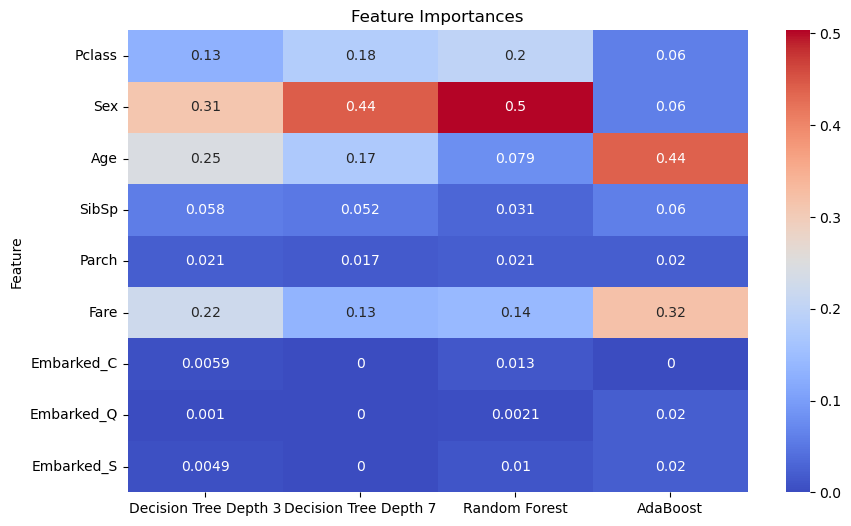

In [130]:
# create a dataframe with the feature importances from all the models
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree Depth 3': model.feature_importances_,
    'Decision Tree Depth 7': model2.feature_importances_,
    'Random Forest': random_forest_best.feature_importances_,
    'AdaBoost': adaboost_model.feature_importances_
})

# create a heatmap from the data
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importances_df.set_index('Feature'), annot=True, cmap='coolwarm')
plt.title("Feature Importances")
plt.show()


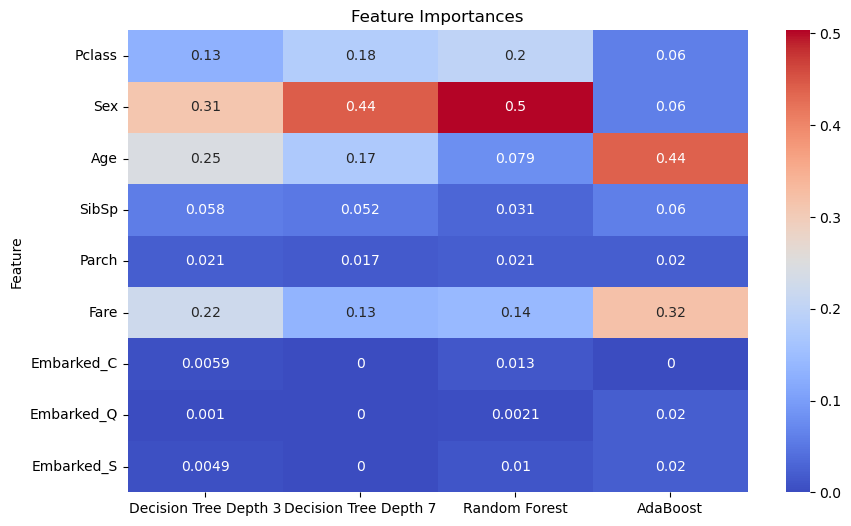

In [131]:
# save the plot
plt.figure(figsize=(10, 5))
sns.heatmap(feature_importances_df.set_index('Feature'), annot=True, cmap='coolwarm')
plt.title("Feature Importances")
plt.savefig("feature_importances_heatmap.png")